# numpy 와 Image 다루기

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import pandas as pd
import numpy as np
%matplotlib inline

try :
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:
    # Mac 인 경우
        rc('font', family='AppleGothic')
except :
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

### 저장된 이미 읽어오기
IPython.display.Image

In [2]:
from IPython.display import Image

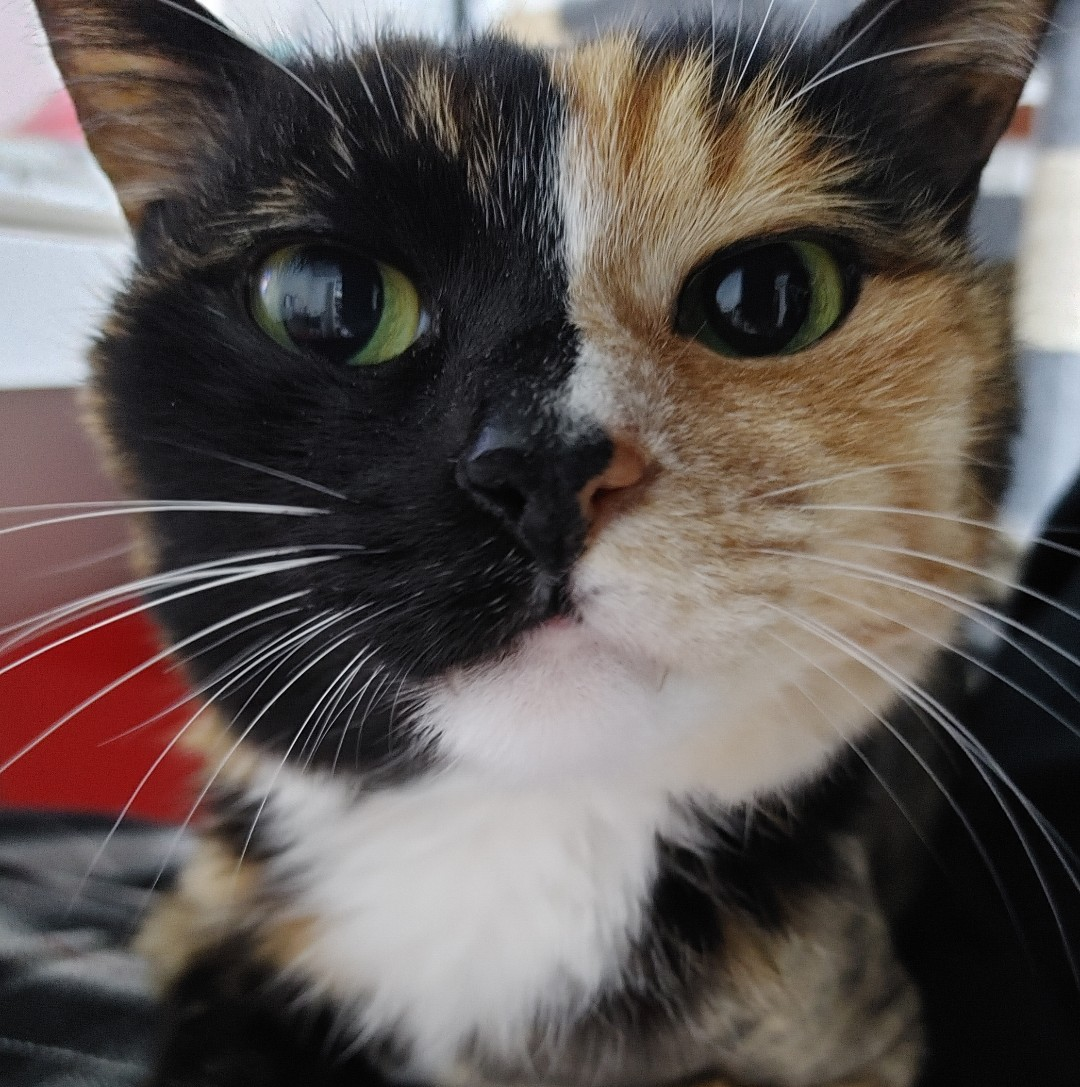

In [3]:
img_path = 'data/cat.jpg'
Image(img_path)

In [4]:
# 이미지를 array 객체 리턴
arr = plt.imread(img_path)
arr

array([[[217, 209, 222],
        [216, 208, 221],
        [215, 207, 220],
        ...,
        [100, 109, 126],
        [100, 109, 126],
        [ 99, 108, 125]],

       [[213, 205, 218],
        [219, 211, 224],
        [215, 207, 220],
        ...,
        [ 99, 108, 125],
        [101, 110, 127],
        [104, 113, 130]],

       [[217, 209, 222],
        [212, 204, 217],
        [217, 209, 222],
        ...,
        [ 98, 107, 124],
        [ 96, 105, 122],
        [ 96, 105, 122]],

       ...,

       [[ 30,  31,  35],
        [ 37,  38,  42],
        [ 23,  24,  28],
        ...,
        [  8,   8,   8],
        [  7,   7,   7],
        [  6,   6,   6]],

       [[ 24,  25,  29],
        [ 30,  31,  35],
        [ 29,  30,  34],
        ...,
        [  9,   9,   9],
        [  9,   9,   9],
        [  8,   8,   8]],

       [[ 28,  29,  33],
        [ 23,  24,  28],
        [ 37,  38,  42],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]]

In [5]:
# (높이, 넓이, 4:채널수(RGBA)) : 컬러이미지
# (높이, 넓이, 3:채널수(RGB)) : 컬러이미지
# (높이, 넓이) : 흑백
arr.shape

(1087, 1080, 3)

In [6]:
arr.ndim

3

In [7]:
arr[0]

array([[217, 209, 222],
       [216, 208, 221],
       [215, 207, 220],
       ...,
       [100, 109, 126],
       [100, 109, 126],
       [ 99, 108, 125]], dtype=uint8)

In [8]:
arr[0, 5] # 높이 215, 넓이 207, 색상 220

array([215, 207, 220], dtype=uint8)

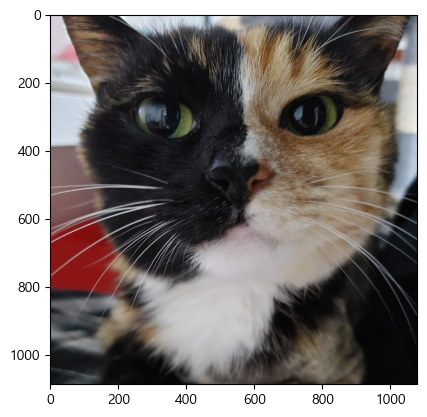

In [9]:
plt.imshow(arr)
# 최상단의 좌표는 (0, 0) 이다.

In [10]:
arr.shape

(1087, 1080, 3)

### slicing

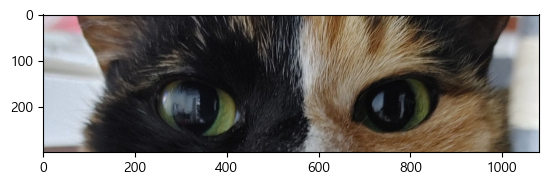

In [11]:
plt.imshow(arr[100:400])

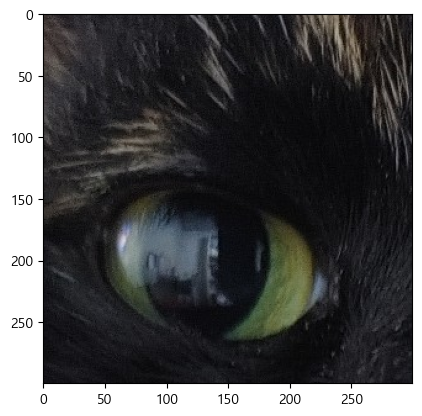

In [12]:
plt.imshow(arr[100:400, 200:500])

In [14]:
pupil = arr[100:400, 200:500]

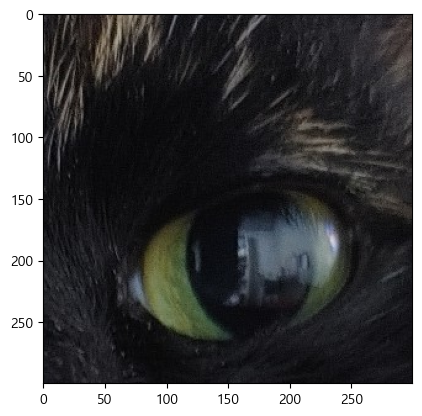

In [15]:
# 좌우 반전
plt.imshow(pupil[::, ::-1])

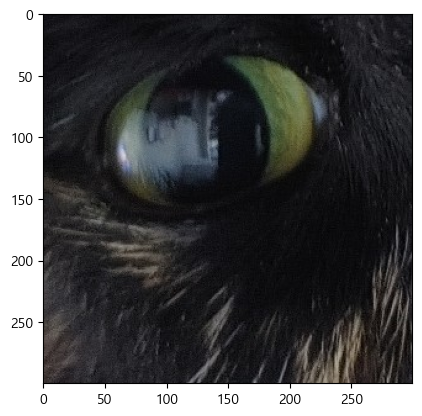

In [16]:
# 상하 반전
plt.imshow(pupil[::-1, ::])

### gray scale 로 변경하기

In [18]:
r = pupil[:,:,0]
r

array([[75, 62, 49, ..., 41, 37, 34],
       [64, 64, 46, ..., 40, 37, 21],
       [64, 70, 58, ..., 47, 50, 27],
       ...,
       [17, 23, 22, ..., 28, 26, 24],
       [21, 22, 22, ..., 28, 28, 26],
       [17, 15, 21, ..., 26, 26, 25]], dtype=uint8)

In [19]:
r.shape

(300, 300)

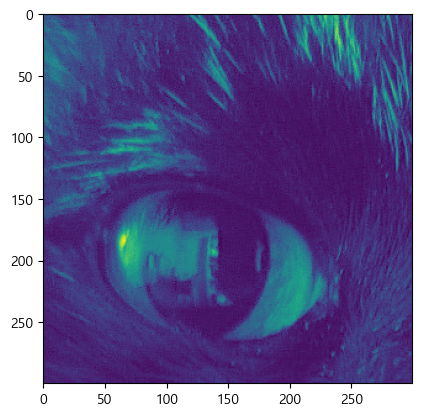

In [20]:
plt.imshow(r)

- image_arr[:,:,0] => red 색상
- image_arr[:,:,1] => green 색상
- image_arr[:,:,2] => blue 색상
- image_arr[:,:,4] => alpha 값

In [21]:
def color_to_grayscale(image_arr):
    return np.dot(
        image_arr,
        np.array([0.299, 0.589, 0.114])
    )

In [22]:
gray = color_to_grayscale(arr)
gray.shape

(1087, 1080)

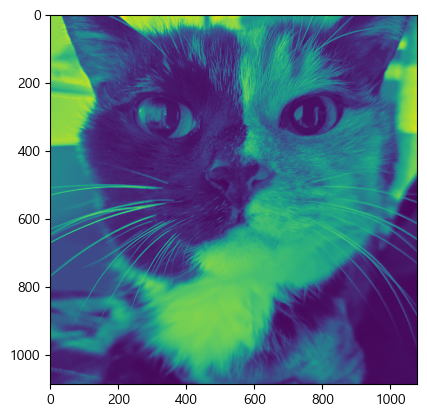

In [23]:
plt.imshow(gray)

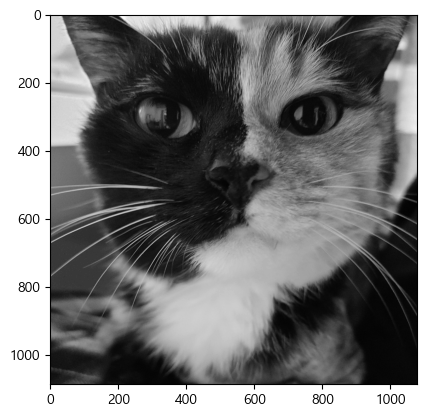

In [24]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))

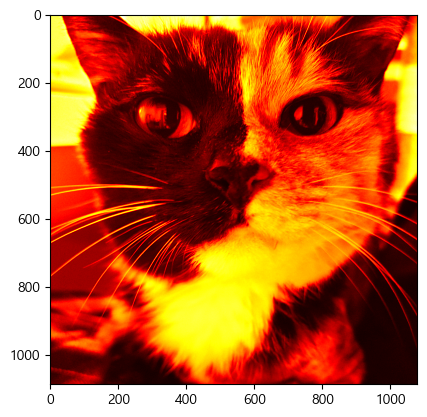

In [25]:
plt.imshow(gray, cmap=plt.get_cmap('hot'))

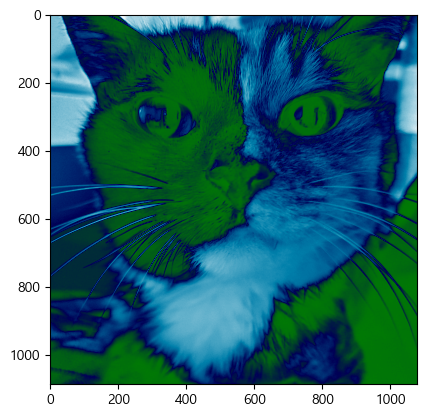

In [26]:
plt.imshow(gray, cmap=plt.get_cmap('ocean'))

[Cmap 참조]   
https://matplotlib.org/2.0.2/users/colormaps.html    
https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html   

r, g, b 의 3개의 색을 한개의 색으로 변경하는 공식
- 0.299, 0.589, 0.114(Green 으로 변경하는 값)

In [28]:
test = np.dot(arr,np.array([0.299, 0.589, 0.114]))
test

array([[213.292, 212.29 , 211.288, ..., 108.465, 108.465, 107.463],
       [209.284, 215.296, 211.288, ..., 107.463, 109.467, 112.473],
       [213.292, 208.282, 213.292, ..., 106.461, 104.457, 104.457],
       ...,
       [ 31.219,  38.233,  24.205, ...,   8.016,   7.014,   6.012],
       [ 25.207,  31.219,  30.217, ...,   9.018,   9.018,   8.016],
       [ 29.215,  24.205,  38.233, ...,  11.022,  11.022,  11.022]])

In [34]:
len(arr[0])

1080

In [32]:
test[0]

array([213.292, 212.29 , 211.288, ..., 108.465, 108.465, 107.463])

In [33]:
a = np.array([[1,2], [3,4]])
b = np.array([5,6])

c = np.dot(a, b)
c

array([17, 39])